In [1]:
import re
import json
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Dictionnaire de mapping des modalités
mapping = {
    'scissors': 'ciseau',
    'rock': 'pierre',
    'paper': 'feuille'
}

def extract_choices_content(file_path):
    with open(file_path, 'r') as file:
        lines = file.readlines()

    player1_choices = []
    player2_choices = []

    for line in lines:
        line = line.strip()
        if line.startswith('Content'):
            match = re.search(r'"choices"\s*:\s*({.*?})', line)
            if match:
                choices = json.loads(match.group(1))
                player1_choice = list(choices.values())[0]
                player2_choice = list(choices.values())[1]
                player1_choices.append(mapping.get(player1_choice, player1_choice))
                player2_choices.append(mapping.get(player2_choice, player2_choice))

    return player1_choices, player2_choices

# Spécifie le chemin du fichier
file_path = 'json_results.txt'

# Appelle la fonction pour extraire les choix du player1 et du joueur
player1_choices, player_choices = extract_choices_content(file_path)

# Crée un DataFrame avec les colonnes "Joueur 1" et "Joueur 2"
data = pd.DataFrame({'player1': player1_choices, 'player2': player_choices})

# Affiche le DataFrame
print(data)



    player1  player2
0   feuille   pierre
1    pierre  feuille
2    pierre   ciseau
3    pierre  feuille
4    pierre  feuille
5    ciseau  feuille
6    pierre   ciseau
7    pierre  feuille
8    pierre  feuille
9    pierre   ciseau
10   pierre   pierre
11   ciseau  feuille
12   pierre  feuille
13   pierre   pierre
14   pierre   ciseau
15   ciseau  feuille
16  feuille   ciseau
17   pierre   pierre
18   pierre  feuille
19   pierre  feuille


In [20]:


# Assumons que le jeu de données est un DataFrame nommé 'data'
# data = pd.read_excel('data.xlsx')  # Décommente si tu charges les données depuis un fichier

data['player1_win'] = (data['player1'] == 'pierre') & (data['player2'] == 'ciseau') | (data['player1'] == 'feuille') & (data['player2'] == 'pierre') | (data['player1'] == 'ciseau') & (data['player2'] == 'feuille')
data['player2_win'] = (data['player1'] == 'ciseau') & (data['player2'] == 'pierre') | (data['player1'] == 'feuille') & (data['player2'] == 'ciseau') | (data['player1'] == 'pierre') & (data['player2'] == 'feuille')
data['draw'] = (data['player1'] == 'pierre') & (data['player2'] == 'pierre') | (data['player1'] == 'feuille') & (data['player2'] == 'feuille') | (data['player1'] == 'ciseau') & (data['player2'] == 'ciseau')
data['player2_win_rate'] = round(data['player2_win'].expanding().mean(), 2)
data['player1_win_rate'] = round(data['player1_win'].expanding().mean(), 2)

# Calculer les fréquences de chaque modalité pour chaque colonne
frequences_player1 = data['player1'].value_counts()
frequences_player2 = data['player2'].value_counts()
frequences_player1_win = data['player1_win'].value_counts()
frequences_player2_win = data['player2_win'].value_counts()
frequences_draw = data['draw'].value_counts()

# Calculer le nombre de victoires pour chaque action
victories = {
    'pierre': data[(data['player1'] == 'pierre') & data['player1_win']].shape[0] + data[(data['player2'] == 'pierre') & data['player2_win']].shape[0],
    'feuille': data[(data['player1'] == 'feuille') & data['player1_win']].shape[0] + data[(data['player2'] == 'feuille') & data['player2_win']].shape[0],
    'ciseau': data[(data['player1'] == 'ciseau') & data['player1_win']].shape[0] + data[(data['player2'] == 'ciseau') & data['player2_win']].shape[0]
}

# Calculer le nombre total de fois où chaque action est jouée
total_played = {
    'pierre': data['player1'].value_counts().get('pierre', 0) + data['player2'].value_counts().get('pierre', 0),
    'feuille': data['player1'].value_counts().get('feuille', 0) + data['player2'].value_counts().get('feuille', 0),
    'ciseau': data['player1'].value_counts().get('ciseau', 0) + data['player2'].value_counts().get('ciseau', 0)
}


# Calculer le taux de victoire pour chaque action joueur 1
win_rates = {action: victories[action] / total_played[action] for action in victories}


victories_player1 = {
    'pierre': data[(data['player1'] == 'pierre') & data['player1_win']].shape[0],
    'feuille': data[(data['player1'] == 'feuille') & data['player1_win']].shape[0],
    'ciseau': data[(data['player1'] == 'ciseau') & data['player1_win']].shape[0]
}

# Calculer le nombre total de fois où chaque action est jouée
total_played_player1 = {
    'pierre': data['player1'].value_counts().get('pierre', 0) ,
    'feuille': data['player1'].value_counts().get('feuille', 0) ,
    'ciseau': data['player1'].value_counts().get('ciseau', 0)
}

# Calculer le taux de victoire pour chaque action
win_rates_player1 = {action: victories_player1[action] / total_played_player1[action] for action in victories_player1}


# Calculer le taux de victoire pour chaque action joueur 2
win_rates = {action: victories[action] / total_played[action] for action in victories}


victories_player2 = {
    'pierre': data[(data['player2'] == 'pierre') & data['player2_win']].shape[0],
    'feuille': data[(data['player2'] == 'feuille') & data['player2_win']].shape[0],
    'ciseau': data[(data['player2'] == 'ciseau') & data['player2_win']].shape[0]
}

# Calculer le nombre total de fois où chaque action est jouée
total_played_player2 = {
    'pierre': data['player2'].value_counts().get('pierre', 0) ,
    'feuille': data['player2'].value_counts().get('feuille', 0) ,
    'ciseau': data['player2'].value_counts().get('ciseau', 0)
}

# Calculer le taux de victoire pour chaque action
win_rates_player2 = {action: victories_player2[action] / total_played_player2[action] for action in victories_player2}


# Afficher les premières lignes du DataFrame
print(data.head(5))


   player1  player2  player1_win  player2_win   draw  player2_win_rate  \
0  feuille   pierre         True        False  False              0.00   
1   pierre  feuille        False         True  False              0.50   
2   pierre   ciseau         True        False  False              0.33   
3   pierre  feuille        False         True  False              0.50   
4   pierre  feuille        False         True  False              0.60   

   player1_win_rate  
0              1.00  
1              0.50  
2              0.67  
3              0.50  
4              0.40  


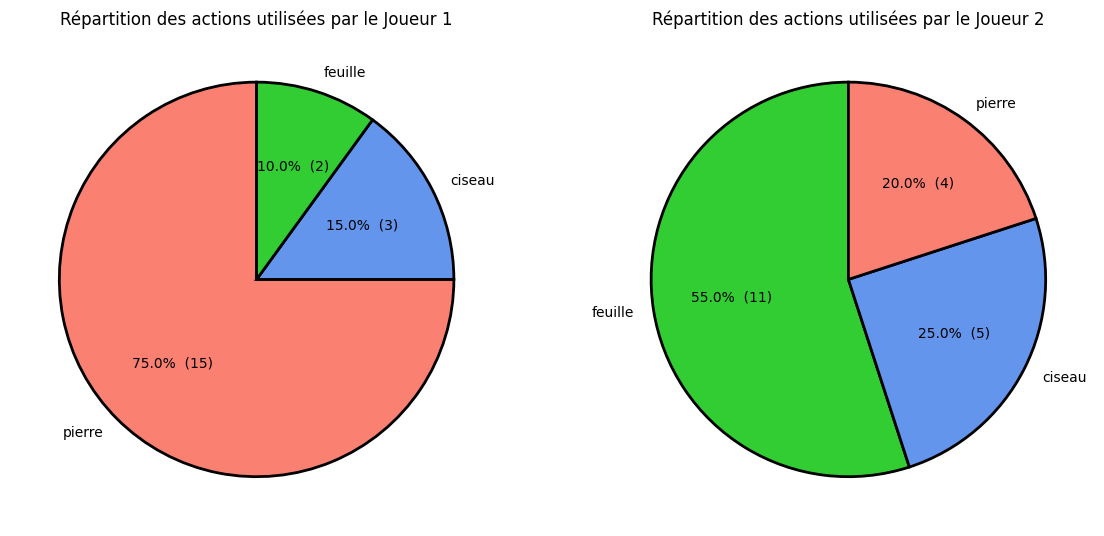

In [4]:
# Définir les couleurs pour chaque modalité
couleurs = {
    'pierre': 'salmon',
    'feuille': 'limegreen',
    'ciseau': 'cornflowerblue'
}

fig, axs = plt.subplots(1, 2, figsize=(14, 7))

def make_autopct(values):
    def my_autopct(pct):
        total = sum(values)
        val = int(round(pct*total/100.0))
        return '{p:.1f}%  ({v:d})'.format(p=pct,v=val)
    return my_autopct

# Graphique circulaire pour la colonne Bot
wedges, texts, autotexts = axs[0].pie(frequences_player1,
                                    labels=frequences_player1.index,
                                    colors=[couleurs[mod] for mod in frequences_player1.index],
                                    autopct=make_autopct(frequences_player1),
                                    startangle=90,
                                    wedgeprops={'edgecolor': 'black', 'linewidth': 2})
axs[0].set_title('Répartition des actions utilisées par le Joueur 1')

# Graphique circulaire pour la colonne Joueur
wedges, texts, autotexts = axs[1].pie(frequences_player2,
                                    labels=frequences_player2.index,
                                    colors=[couleurs[mod] for mod in frequences_player2.index],
                                    autopct=make_autopct(frequences_player2),
                                    startangle=90,
                                    wedgeprops={'edgecolor': 'black', 'linewidth': 2})
axs[1].set_title('Répartition des actions utilisées par le Joueur 2')

plt.show()

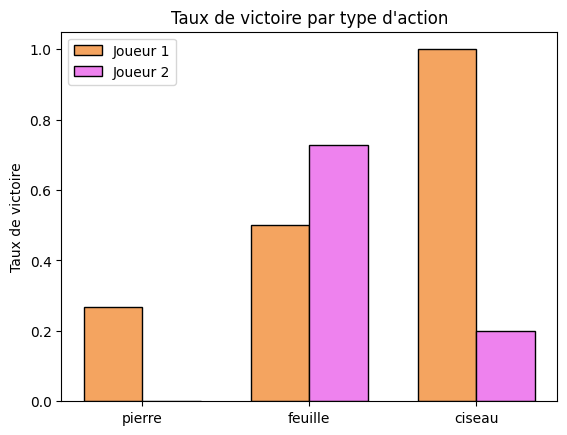

In [25]:
couleurs_1 = {
    'pierre': 'Sandybrown',
    'feuille': 'Sandybrown',
    'ciseau': 'Sandybrown'
}

couleurs_2 = {
    'pierre': 'Violet',
    'feuille': 'Violet',
    'ciseau': 'Violet'
}

labels = list(win_rates_player1.keys())
player1_values = list(win_rates_player1.values())
player2_values = list(win_rates_player2.values())

x = np.arange(len(labels))
width = 0.35

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, player1_values, width, label='Joueur 1', color=[couleurs_1[action] for action in labels], edgecolor='black')
rects2 = ax.bar(x + width/2, player2_values, width, label='Joueur 2', color=[couleurs_2[action] for action in labels], edgecolor='black')


ax.set_ylabel('Taux de victoire')
ax.set_title("Taux de victoire par type d'action")
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

plt.show()

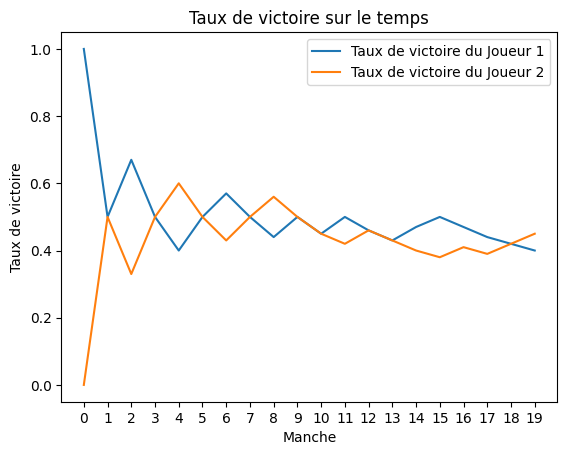

In [9]:
plt.plot(data.index, data['player1_win_rate'], label='Taux de victoire du Joueur 1')
plt.plot(data.index, data['player2_win_rate'], label='Taux de victoire du Joueur 2')
plt.xlabel('Manche')
plt.ylabel('Taux de victoire')
plt.title('Taux de victoire sur le temps')
plt.xticks(range(len(data.index)))  # Set x-ticks to integers
plt.legend()
plt.show()